In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Normalization

inputs = Input(shape=(28, 28, 1))
outputs = Normalization()(inputs)
outputs = Conv2D(filters=64, kernel_size=3, activation='relu')(outputs)
outputs = Conv2D(filters=64, kernel_size=3, activation='relu')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Flatten()(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization_2 (Normalizat  (None, 28, 28, 1)        3         
 ion)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0   

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 197s 130ms/step - loss: 0.3015 - accuracy: 0.9096 - val_loss: 0.0930 - val_accuracy: 0.9707
Epoch 2/10
1500/1500 [==============================] - 191s 127ms/step - loss: 0.1668 - accuracy: 0.9486 - val_loss: 0.0721 - val_accuracy: 0.9780
Epoch 3/10
1500/1500 [==============================] - 189s 126ms/step - loss: 0.1410 - accuracy: 0.9574 - val_loss: 0.0695 - val_accuracy: 0.9793
Epoch 4/10
1500/1500 [==============================] - 187s 125ms/step - loss: 0.1269 - accuracy: 0.9617 - val_loss: 0.0730 - val_accuracy: 0.9791
Epoch 5/10
1500/1500 [==============================] - 187s 125ms/step - loss: 0.1192 - accuracy: 0.9642 - val_loss: 0.0573 - val_accuracy: 0.9822
Epoch 6/10
1500/1500 [==============================] - 185s 124ms/step - loss: 0.1091 - accuracy: 0.9670 - val_loss: 0.0646 - val_accuracy: 0.9814
Epoch 7/10
1500/1500 [==============================] - 186s 124ms/step - loss: 0.0999 - accuracy: 0.9680 - val_

In [12]:
predicted = model.predict(x_test).argmax(axis=1)

In [17]:
y_test = y_test.argmax(axis=1)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



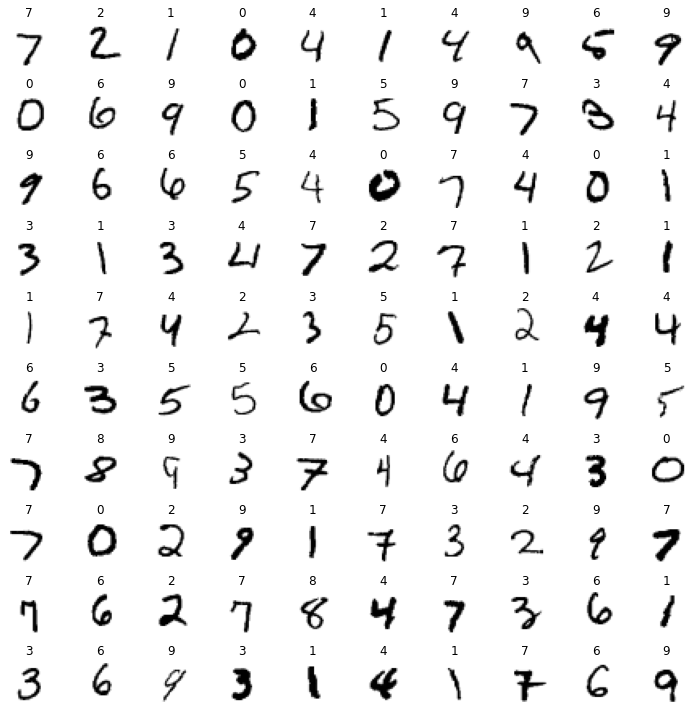

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')
plt.tight_layout()
plt.show()